In [2]:
import random
import pandas as pd
import numpy as np
import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings(action='ignore') 

In [3]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

m### 데이터 분석 결과 보고서

#### 1. train.csv 데이터셋 개요

- **기간**: 2019년 01월 01일부터 2023년 03월 03일까지
- **품목**:
  - TG: 감귤
  - BC: 브로콜리
  - RD: 무
  - CR: 당근
  - CB: 양배추
- **유통 법인 코드**: A부터 F까지 존재
- **지역 코드**: 
  - J: 제주도 제주시
  - S: 제주도 서귀포시
- **유통된 물량 (supply(kg))**: kg 단위
- **가격 (price(원/kg))**: kg당 가격, 원 단위

#### 2. international_trade.csv 데이터셋 개요

- **기간**: 월 단위로 제공
- **품목명**: 다양한 농산물 (예: 토마토, 양파 등)
- **수출 중량**: kg 단위
- **수출 금액**: 천 달러 단위
- **수입 중량**: kg 단위
- **수입 금액**: 천 달러 단위
- **무역수지**: 수출 금액 - 수입 금액 (천 달러 단위)

In [4]:
train_data = pd.read_csv('./train.csv')
international_trade_data = pd.read_csv('./international_trade.csv')
test_data = pd.read_csv('./test.csv')
sample_submission = pd.read_csv('./sample_submission.csv')

In [7]:
train_data

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0
...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0


In [16]:
international_trade_data[international_trade_data['품목명'] == '감귤']

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
17,2019-01,감귤,58368,172,0,0,172
41,2019-02,감귤,8474,33,0,0,33
64,2019-03,감귤,2061,10,4599,12,-2
88,2019-04,감귤,328,9,13457,36,-27
114,2019-05,감귤,2560,21,0,0,21
140,2019-06,감귤,3417,21,0,0,21
167,2019-07,감귤,4603,27,0,0,27
194,2019-08,감귤,5859,31,0,0,31
223,2019-09,감귤,8050,39,0,0,39
248,2019-10,감귤,3651,14,0,0,14


In [32]:
train_data.head()

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0


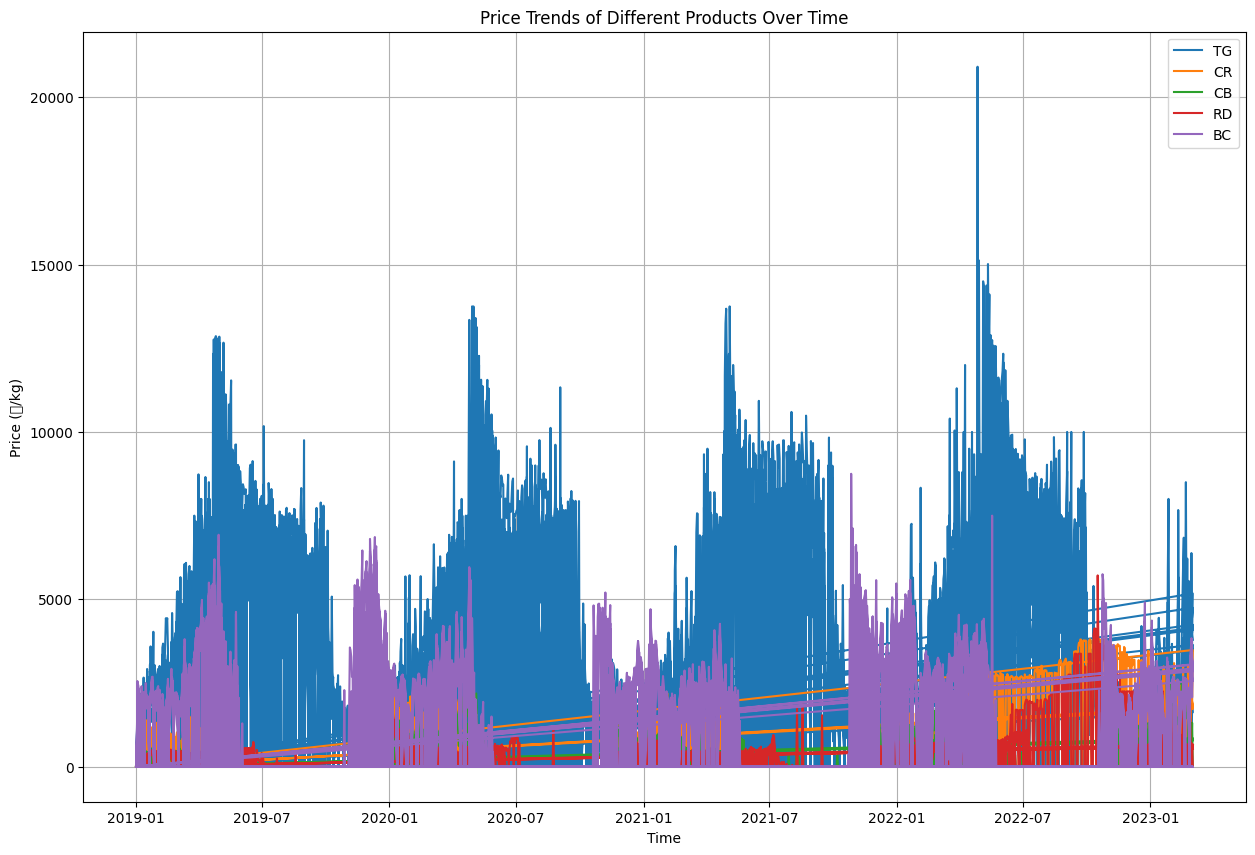

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert timestamp to datetime format for easier analysis
train_data['timestamp'] = pd.to_datetime(train_data['timestamp'])

# Analyzing price trends over time for each product
plt.figure(figsize=(15, 10))

# Loop through each item and plot its price trend
for item in train_data['item'].unique():
    temp_data = train_data[train_data['item'] == item]
    plt.plot(temp_data['timestamp'], temp_data['price(원/kg)'], label=item)

plt.title('Price Trends of Different Products Over Time')
plt.xlabel('Time')
plt.ylabel('Price (원/kg)')
plt.legend()
plt.grid(True)
plt.show()

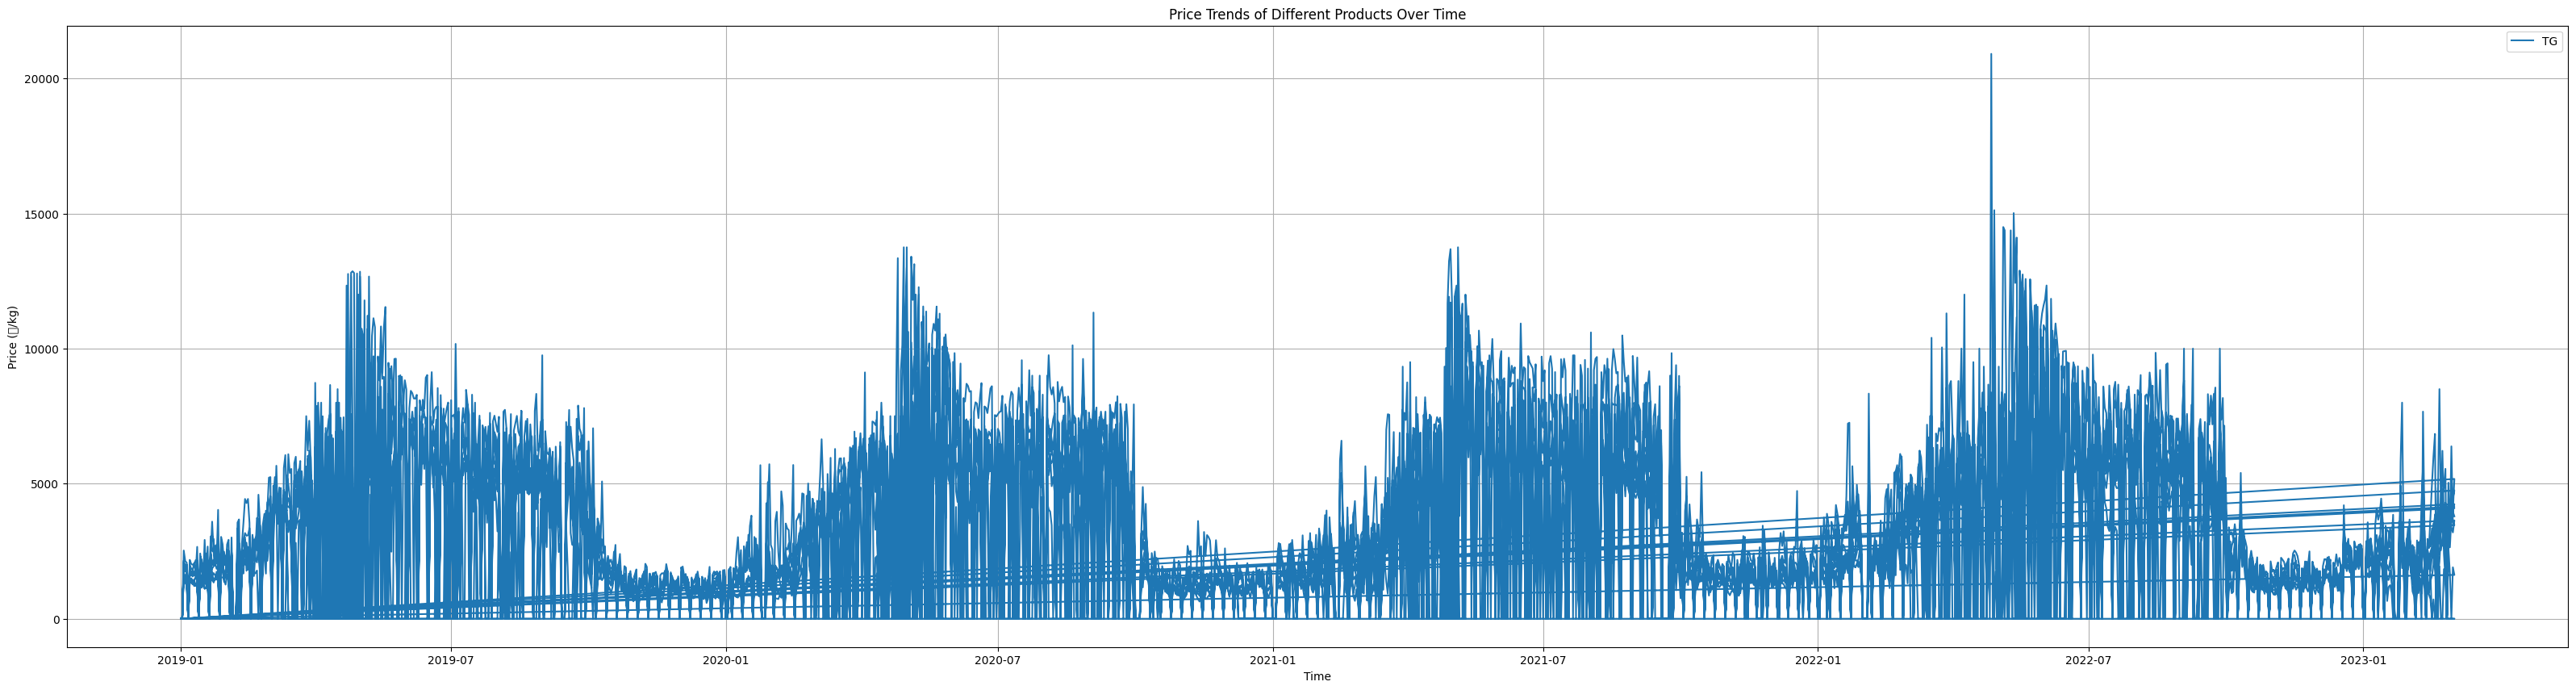

In [36]:
plt.figure(figsize=(40, 10))

# Loop through each item and plot its price trend
item = 'TG'
temp_data = train_data[train_data['item'] == item]
plt.plot(temp_data['timestamp'], temp_data['price(원/kg)'], label=item)

plt.title('Price Trends of Different Products Over Time')
plt.xlabel('Time')
plt.ylabel('Price (원/kg)')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
test_df.head()

,ID,timestamp,item,corporation,location
0,TG_A_J_20230304,2023-03-04,TG,A,J
1,TG_A_J_20230305,2023-03-05,TG,A,J
2,TG_A_J_20230306,2023-03-06,TG,A,J
3,TG_A_J_20230307,2023-03-07,TG,A,J
4,TG_A_J_20230308,2023-03-08,TG,A,J


In [14]:
sample_submission.head()

,ID,answer
0,TG_A_J_20230304,0
1,TG_A_J_20230305,0
2,TG_A_J_20230306,0
3,TG_A_J_20230307,0
4,TG_A_J_20230308,0


In [24]:
international_trade_df.head()

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
0,2019-01,토마토(신선한 것이나 냉장한 것으로 한정한다),356571,990,0,0,990
1,2019-01,양파,821330,222,4003206,1118,-896
2,2019-01,쪽파,60,1,93405,128,-127
3,2019-01,꽃양배추와 브로콜리(broccoli),160,1,638913,563,-562
4,2019-01,방울다다기 양배추,0,0,7580,38,-38
